<a id = '1'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1 | Importing packages</b></p>
</div>

In [1]:
import pandas as pd
import numpy as np

import re
import arabic_reshaper
from bidi.algorithm import get_display
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


from sklearn.feature_extraction.text import TfidfVectorizer as tfid
from sklearn.feature_selection import SelectPercentile, f_classif, chi2
from sklearn import *

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay


from sklearn.preprocessing import MaxAbsScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

import scikitplot as skplt

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_colwidth", 200)

%matplotlib inline

<br>
<br>
<br>
<a id = '2'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2 | Upload Dataset</b></p>
</div>

In [4]:
new_data = pd.read_excel("Arabic_sad_news_responses_NEW.xlsx")
new_data.head(3)

,favorite_count,full_text,reply_count,retweet_count
0,2873,في فاجعة مأساوية و مؤلمة .. \n\nوفاة 5 أطفال في الأردن بعد نشوب حريق داهم شقتهم ، رغم محاولات والدهم والدفاع المدني لإنقاذهم.\n- https://t.co/q7xhAUm1sc,3105,955
1,3,@AJELNEWS24 الله يرحمهم يارب والله شي يقطع القلب,0,0
2,2,@iodx18 @AJELNEWS24 الله يربط علي قلبه ويرزقه الصبر والسلوان,0,0


In [5]:
new_data.shape

(2096, 4)


<a id = '3'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3 | Pre-processings</b></p>
</div>

In [6]:
df =  new_data.drop(columns=['favorite_count', 'reply_count', 'retweet_count'], axis=1)
df.shape

(2096, 1)

In [7]:
# df.drop_duplicates(inplace = True, ignore_index=True)
# df.shape

In [8]:
df.head()

,full_text
0,في فاجعة مأساوية و مؤلمة .. \n\nوفاة 5 أطفال في الأردن بعد نشوب حريق داهم شقتهم ، رغم محاولات والدهم والدفاع المدني لإنقاذهم.\n- https://t.co/q7xhAUm1sc
1,@AJELNEWS24 الله يرحمهم يارب والله شي يقطع القلب
2,@iodx18 @AJELNEWS24 الله يربط علي قلبه ويرزقه الصبر والسلوان
3,@AJELNEWS24 إنا لله و إنا إليه راجعون.\nاللهم أجعلهم شفعاءاً لوالديهم وأخلف على والديهم خيراً وأربط على قلوبهم..
4,@elham2001_56 @AJELNEWS24 اللهم آميين يارب ويرحمهم ويصبر ابوهم وامهم


In [9]:
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•'
    
def preprocess(text_string):
    space_pattern = '\s+'
    new_line = '\n+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    non_word_char = '[^\w]'
    underscore = '_[\w]+'
    
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(new_line, ' ', parsed_text)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    parsed_text = re.sub(non_word_char, ' ', parsed_text)
    parsed_text = re.sub(r"\bو(.*?)\b", r'\1', parsed_text)
    parsed_text = re.sub('([0-9]+)', '', parsed_text)
    parsed_text = re.sub(underscore, ' ', parsed_text)
    
    return parsed_text

In [10]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [11]:
df['tidy_tweets'] = np.vectorize(preprocess)(df['full_text'])

In [12]:
df['tidy_tweets'] = np.vectorize(deEmojify)(df['tidy_tweets'])

In [13]:
df['tidy_tweets'] = df['tidy_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [14]:
df['tidy_tweets'] = df['tidy_tweets'].str.strip()

In [15]:
df['tidy_tweets'] = df['tidy_tweets'].apply(lambda x: x.split()) # tokenizing

In [16]:
stopwords = list(map(str.strip,stopwords.open('arabic')))

In [17]:
df['tidy_tweets'] = df['tidy_tweets'].apply(lambda x: [item for item in x if item not in stopwords])

In [18]:
df.drop(['full_text'], axis = 1, inplace = True)

In [19]:
df['tidy_tweets'] = df['tidy_tweets'].apply(lambda x: ' '.join([w for w in x]))

In [20]:
df.to_csv('tidy_tweets.csv', index=False)

In [21]:
df.head()

,tidy_tweets
0,فاجعة مأساوية مؤلمة فاة أطفال الأردن نشوب حريق داهم شقتهم رغم محاولات الدهم الدفاع المدني لإنقاذهم
1,الله يرحمهم يارب الله شي يقطع القلب
2,الله يربط علي قلبه يرزقه الصبر السلوان
3,لله إليه راجعون اللهم أجعلهم شفعاءا لوالديهم أخلف الديهم خيرا أربط قلوبهم
4,اللهم آميين يارب يرحمهم يصبر ابوهم امهم


In [22]:
df.dropna()
df.shape

(2096, 1)

<br>
<br>
<br>
<a id = '4'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4 | Data Visualization</b></p>
</div>


<br>
<a id = '4.1'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.1 | Word clouds</b></p>
</div>

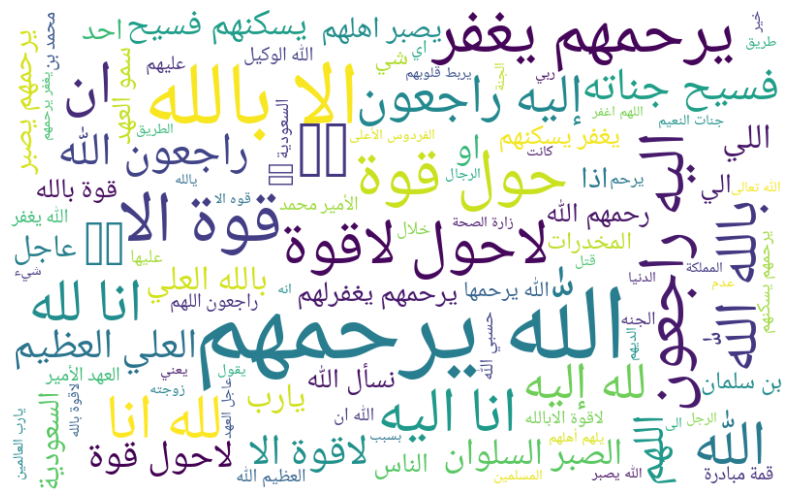

In [23]:
all_words = ' '.join([text for text in df['tidy_tweets']])

all_words = arabic_reshaper.reshape(all_words)
all_words = get_display(all_words)

wordcloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf', width=800, height=500, random_state=21,
                      max_font_size=110, background_color = 'white', colormap = 'viridis',
                     max_words = 100).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("Sad News SA.png");


<br>
<br>
<br>
<a id = '5'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5 | Evaluate our Trained SVM Model</b></p>
</div>


<br>
<a id = '5.1'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.1 | TF-IDF Feature Extracting</b></p>
</div>

In [24]:
transformer = MaxAbsScaler()

In [25]:
# using TfIdf to make words as features by making word vectors

tfidf = tfid(max_features=9000)
features_tfidf = tfidf.fit_transform(df['tidy_tweets'])
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names()
features_tfidf

(2096, 8577)
Sparse Matrix :
   (0, 6349)	0.2783091027336582
  (0, 2543)	0.2298097034758308
  (0, 1736)	0.19954783611616667
  (0, 1752)	0.2298097034758308
  (0, 7123)	0.2783091027336582
  (0, 4972)	0.2540594031047445
  (0, 5314)	0.26412393779699195
  (0, 4763)	0.26412393779699195
  (0, 4551)	0.23987423816807824
  (0, 7728)	0.2783091027336582
  (0, 1025)	0.2540594031047445
  (0, 249)	0.2540594031047445
  (0, 5862)	0.2014393736024983
  (0, 6896)	0.2298097034758308
  (0, 6883)	0.2783091027336582
  (0, 5867)	0.24625274350161755
  (1, 2360)	0.45792384357974625
  (1, 8419)	0.6212936905194861
  (1, 5346)	0.41422044145380216
  (1, 7944)	0.31470772085202203
  (1, 8181)	0.2142349489420554
  (1, 2432)	0.29628325395061905
  (2, 1938)	0.3088351163594226
  (2, 2043)	0.296065226761897
  (2, 8189)	0.5707616040006214
  :	:
  (2093, 2692)	0.7307343355453954
  (2093, 1816)	0.6826619447830893
  (2094, 8359)	0.28608202669745925
  (2094, 5645)	0.28608202669745925
  (2094, 4106)	0.28608202669745925
  (2094, 

,ad,allah,aqzqqz,aqzz,aqzzzzqs,bmj,crossing,fintalk,fttr,gate,...,٢٥,٤٠,٤٠٢,٥٠,٨٠,٨٠٠,٩٠,٩٨٨٣ريال,ٱلل,ﷺعندما
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



<br>
<br>
<br>
<a id = '5.2'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.2 | Emporting Model & Fitting Data</b></p>
</div>

In [26]:
import pickle
fin_File='BoW_Sentiment_Model.pkl'
final_df = pickle.load(open(fin_File, "rb"))

In [27]:
X_fresh = transformer.fit_transform(final_df)
X_fresh.shape

(2096, 7397)

In [28]:
import joblib
classifier = joblib.load('svm_3fold_Sentiment_Model')


<br>
<br>
<br>
<a id = '5.3'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.3 | SVM Prediction</b></p>
</div>

In [29]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

[0 0 1 ... 0 0 0]


In [30]:
new_data['predicted_class'] = y_pred.tolist()
new_data.head()

,favorite_count,full_text,reply_count,retweet_count,predicted_class
0,2873,في فاجعة مأساوية و مؤلمة .. \n\nوفاة 5 أطفال في الأردن بعد نشوب حريق داهم شقتهم ، رغم محاولات والدهم والدفاع المدني لإنقاذهم.\n- https://t.co/q7xhAUm1sc,3105,955,0
1,3,@AJELNEWS24 الله يرحمهم يارب والله شي يقطع القلب,0,0,0
2,2,@iodx18 @AJELNEWS24 الله يربط علي قلبه ويرزقه الصبر والسلوان,0,0,1
3,161,@AJELNEWS24 إنا لله و إنا إليه راجعون.\nاللهم أجعلهم شفعاءاً لوالديهم وأخلف على والديهم خيراً وأربط على قلوبهم..,12,29,1
4,3,@elham2001_56 @AJELNEWS24 اللهم آميين يارب ويرحمهم ويصبر ابوهم وامهم,0,0,0


In [31]:
new_data.to_csv("new_data.tsv", sep='\t', encoding='UTF-8', index=False)


<br>
<br>
<br>
<a id = '6'></a>
<div style="color:white;display:fill;
            background-color:#729091;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>6 | Dataset Analysis</b></p>
</div>

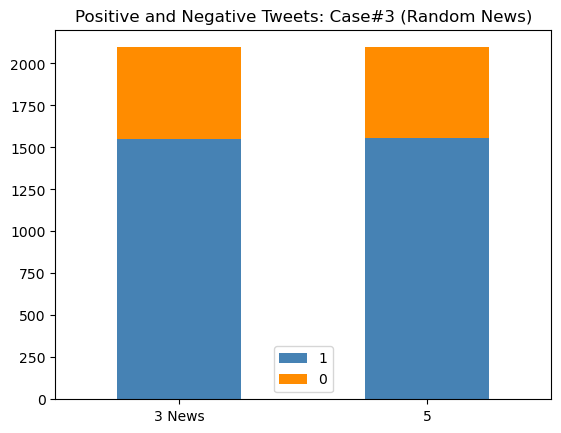

In [47]:
#new data

new = pd.read_excel('new_data.xlsx')

news1 = new.loc[new['category']==1, :]['predicted_class'].value_counts()
news2 = new.loc[new['category']==2, :]['predicted_class'].value_counts()
news3 = new.loc[new['category']==3, :]['predicted_class'].value_counts()
news4 = new.loc[new['category']==4, :]['predicted_class'].value_counts()
df_plot  = pd.DataFrame([news1,news2,news3,news4])
df_plot.index=['First News','Second News', 'Third News', 'Fourth News']

# Plot
df_plot.plot(kind='bar',stacked=True, color=['steelblue','darkorange'], title='Positive and Negative Tweets: Case#3 (Random News)');
plt.xticks(rotation=0, horizontalalignment="center")
plt.savefig("predict classes.png");